Tan Shu Fei
7020466
CSCI361-A1-Task2

#### Import Pandas & Numpy libraries.

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy import log2 as log
import pandas as pd
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pprint import pprint

#### Load csv dataset for Secondary Mushroom Data

In [2]:
colsName = ['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'steam-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

In [3]:
# Read in data from .csv file
shrooms = pd.read_csv('./secondary_data.csv',sep=';')

# Display data
shrooms.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
# Display all the columns names by default
pd.set_option('display.max_columns', None)
shrooms.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [5]:
shrooms.shape

(61069, 21)

In [6]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

There exist 21 variables including the class variable. 

___

### Check for any NAN/NA/0 values 

In [7]:
print("Missing values for each column:\n")
print(shrooms.isnull().sum())

Missing values for each column:

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [8]:
# Fill all cols with missing values with mode

shrooms['cap-surface'].fillna(shrooms['cap-surface'].mode()[0], inplace=True)
shrooms['gill-attachment'].fillna(shrooms['gill-attachment'].mode()[0], inplace=True)
shrooms['gill-spacing'].fillna(shrooms['gill-spacing'].mode()[0], inplace=True)
shrooms['stem-root'].fillna(shrooms['stem-root'].mode()[0], inplace=True)
shrooms['stem-surface'].fillna(shrooms['stem-surface'].mode()[0], inplace=True)
shrooms['veil-type'].fillna(shrooms['veil-type'].mode()[0], inplace=True)
shrooms['veil-color'].fillna(shrooms['veil-color'].mode()[0], inplace=True)
shrooms['ring-type'].fillna(shrooms['ring-type'].mode()[0], inplace=True)
shrooms['spore-print-color'].fillna(shrooms['spore-print-color'].mode()[0], inplace=True)

In [9]:
print("After checking for missing values for each column:\n")
print(shrooms.isnull().sum())

After checking for missing values for each column:

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


___

### Check which attributes is of dtype = object & convert to int/float

In [10]:
# Check current columns dtype
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  object 
 15  veil-color         

In [11]:
#Change all the dtype object to int64 format
encoded_data = {
    "class":{"p":1, "e":0},
    "cap-shape":{"x":1, "f":2, "p":3, "b":4, "c":5, "s":6, "o":7},
    "cap-surface":{"g":1,"h":2,"t":3,"y":4,"e":5,"s":6,"l":7,"d":8,"w":9,"i":10,"k":11},
    "cap-color":{"o":1,"n":2,"e":3,"g":4,"r":5,"w":6,"y":7,"p":8,"u":9,"b":10,"l":11,"k":12},
    "does-bruise-or-bleed":{"f":0,"t":1},
    "gill-attachment":{"e":1,"a":2,"d":3,"s":4,"x":5,"p":6,"f":7},
    "gill-spacing":{"c":1,"d":2,"f":3},
    "gill-color":{"w":1,"n":2,"p":3,"u":4,"b":5,"g":6,"y":7,"r":8,"e":9,"o":10,"k":11,"f":12},
    "stem-root":{"s":1,"b":2,"r":3,"c":4,"f":5},
    "stem-surface":{"y":1,"s":2,"k":3,"i":4,"h":5,"t":6,"g":7,"f":8},
    "stem-color":{"w":1,"y":2,"n":3,"u":4,"b":5,"l":6,"r":7,"p":8,"e":9,"k":10,"g":11,"o":12,"f":13},
    "veil-type":{"u":1},
    "veil-color":{"w":1,"y":2,"n":3,"e":4,"u":5,"k":6},
    "has-ring":{"f":0,"t":1},
    "ring-type":{"g":1,"p":2,"e":3,"l":4,"f":5,"m":6,"r":7,"z":8},
    "spore-print-color":{"k":1,"w":2,"p":3,"r":4,"u":5,"n":6,"g":7},
    "habitat":{"d":1,"m":2,"g":3,"h":4,"l":5,"p":6,"w":7,"u":8},
    "season":{"w":1,"u":2,"a":3,"s":4}
               }

# Make a copy of mushroom dataset to keep the original copy
shroom_copy = shrooms.copy()
shroom_copy = shrooms.replace(encoded_data)
shroom_copy.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,1,1,1,0,1,1,1,16.95,17.09,1,1,1,1,1,1,1,1,1,1
1,1,16.60,1,1,1,0,1,1,1,17.99,18.19,1,1,1,1,1,1,1,1,1,2
2,1,14.07,1,1,1,0,1,1,1,17.80,17.74,1,1,1,1,1,1,1,1,1,1
3,1,14.17,2,2,3,0,1,1,1,15.77,15.98,1,1,1,1,1,1,2,1,1,1
4,1,14.64,1,2,1,0,1,1,1,16.53,17.20,1,1,1,1,1,1,2,1,1,1


In [12]:
# Get concise summary of dataframe after encoding
shroom_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

- All columns successfully removed of dtype = objects
- It's important to clean up before commencement of data visualization to clearly display all data in the columns

### Data Visualisation

In [13]:
# print out the skewness of each features

print('Skewness of all columns:')
skew = shroom_copy.skew()
skew = skew.sort_values()
print(skew)

Skewness of all columns:
ring-type              -0.677191
season                 -0.331000
class                  -0.220995
veil-type               0.000000
gill-attachment         0.660461
gill-color              0.693685
cap-color               0.833015
cap-surface             0.892175
cap-shape               0.979162
has-ring                1.163654
stem-color              1.641295
does-bruise-or-bleed    1.725283
habitat                 1.933213
stem-height             2.020904
stem-surface            2.154089
stem-width              2.164957
gill-spacing            2.179956
stem-root               3.416206
cap-diameter            3.822844
spore-print-color       4.957926
veil-color              7.159143
dtype: float64


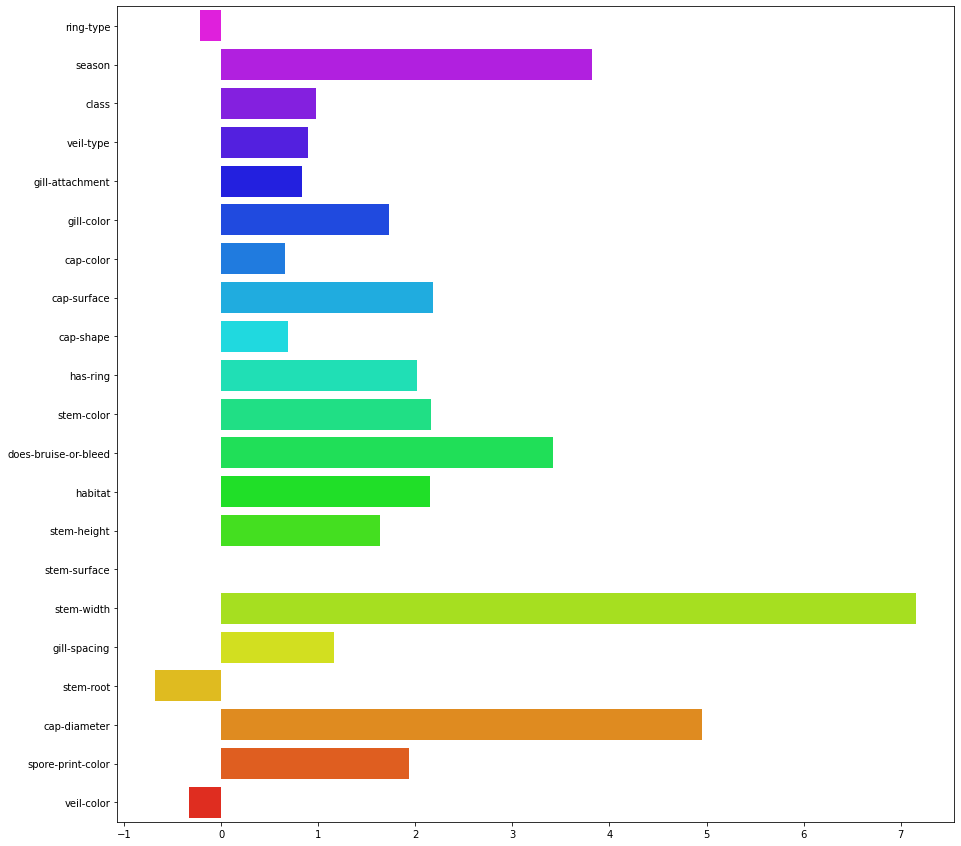

In [14]:
# plot out the diagram to have a clear view of the skewness
plt.figure(figsize=(15,15))
sns.barplot(x=shroom_copy.skew(), y=skew.index, palette = 'gist_rainbow_r')
plt.show()

/var/folders/k_/spkkzdw94rg_b58kztwm7vf80000gn/T/ipykernel_11558/4277030212.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


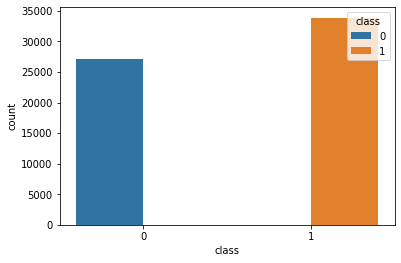

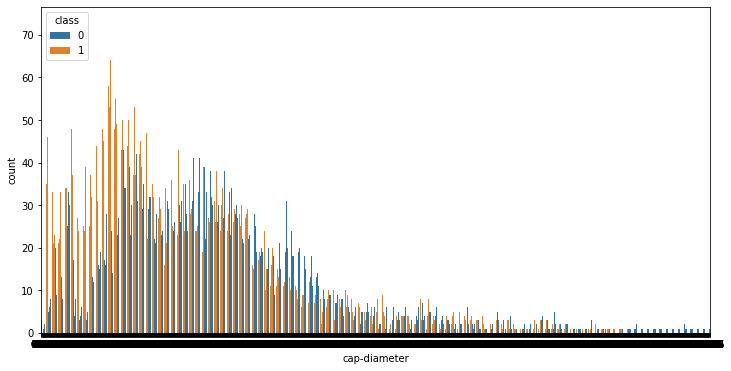

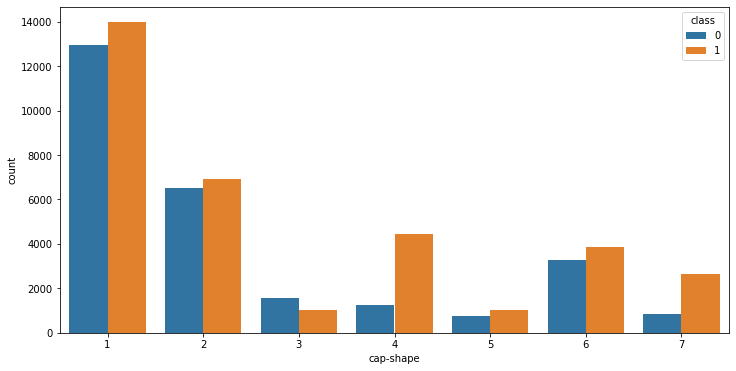

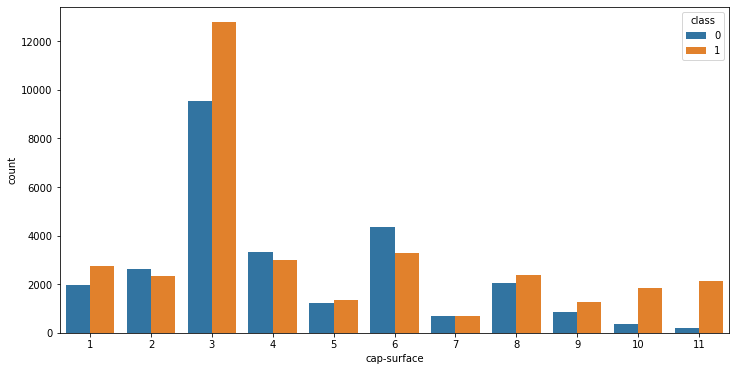

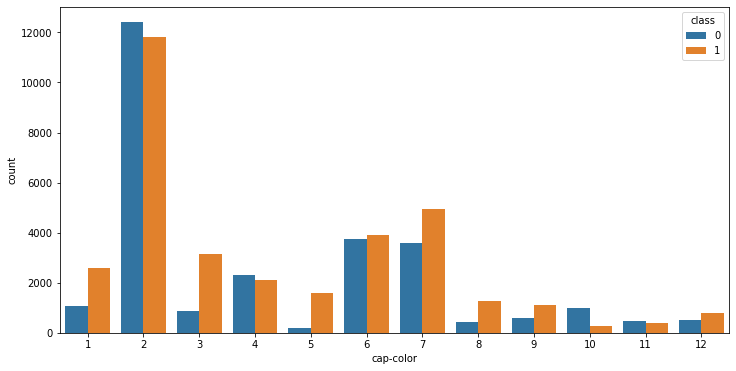

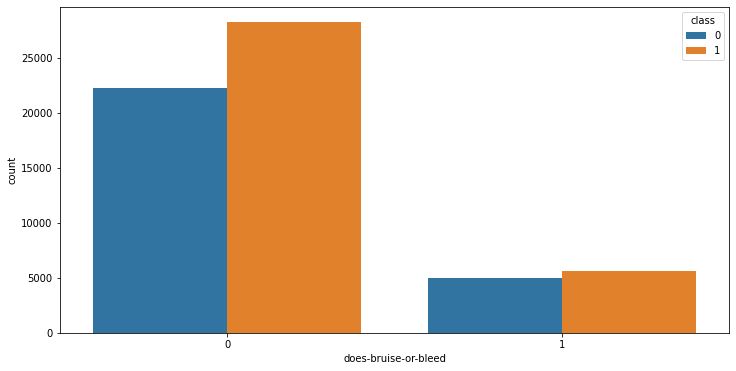

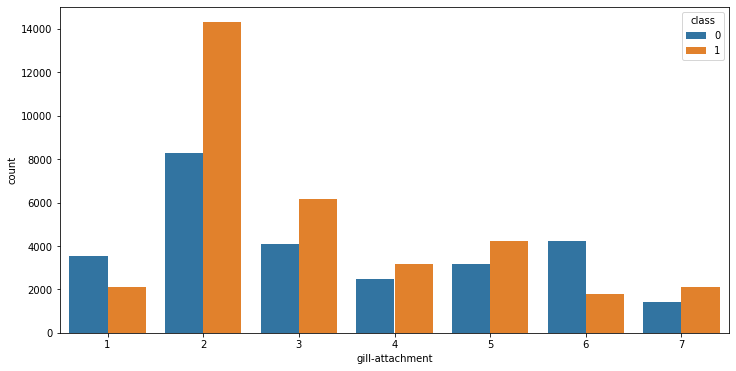

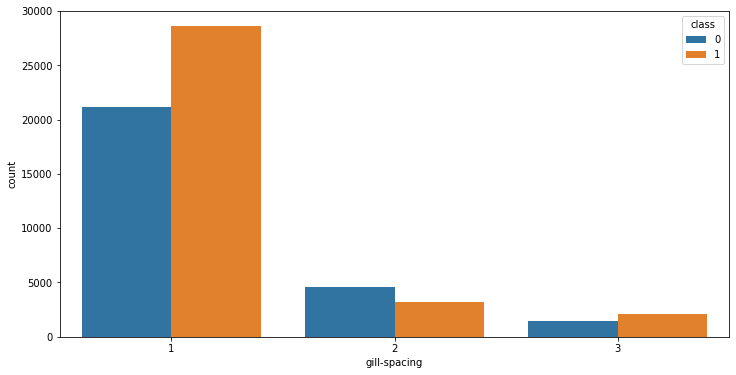

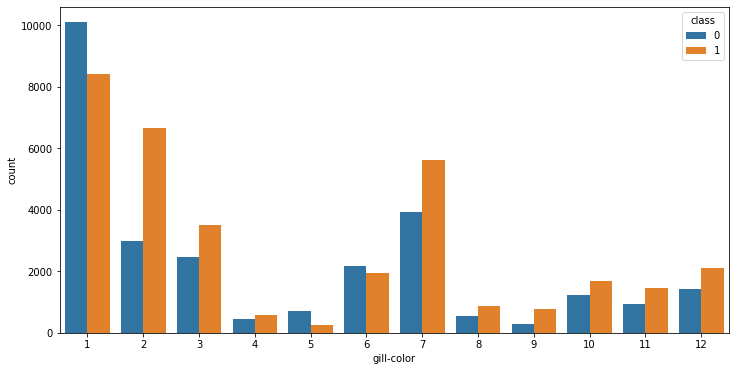

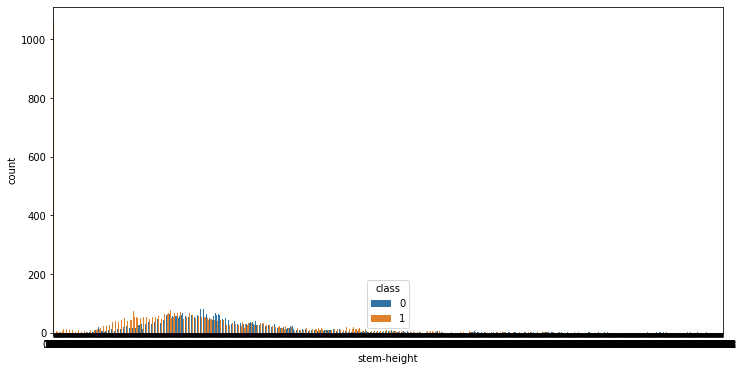

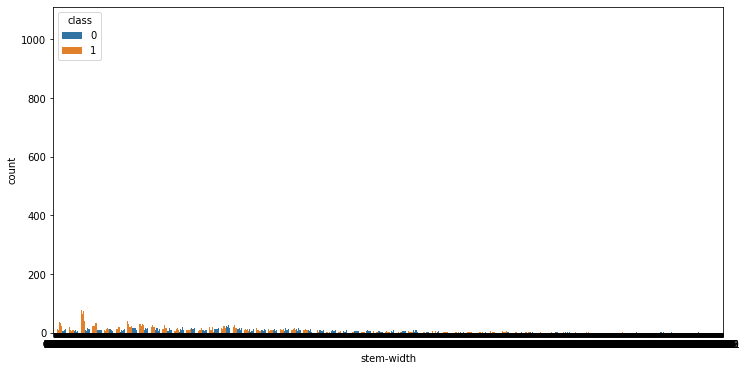

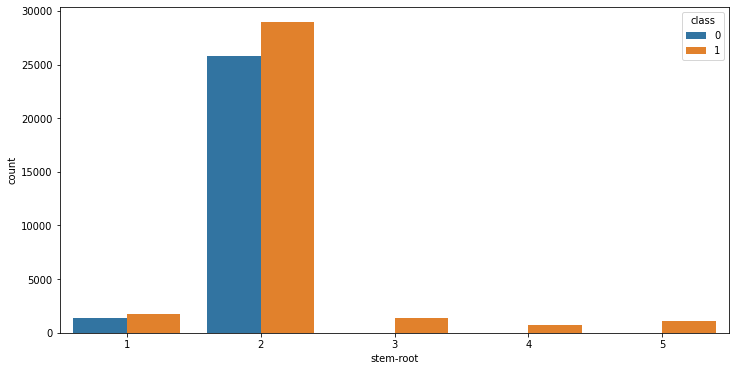

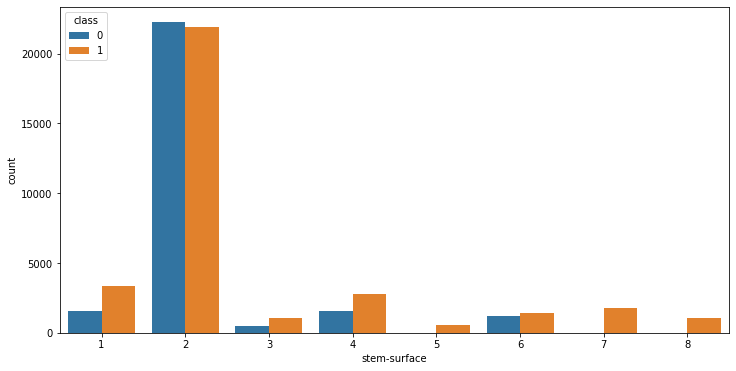

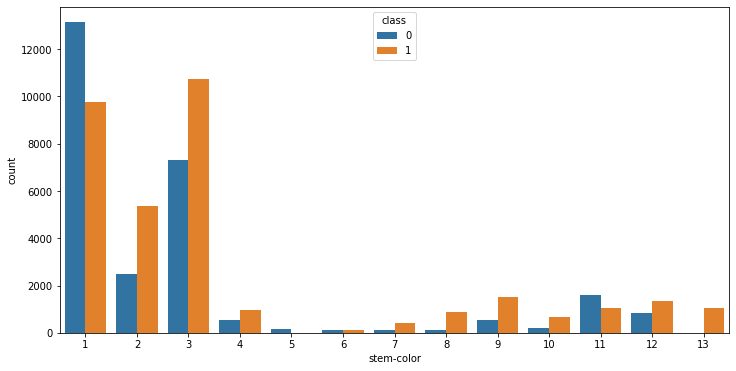

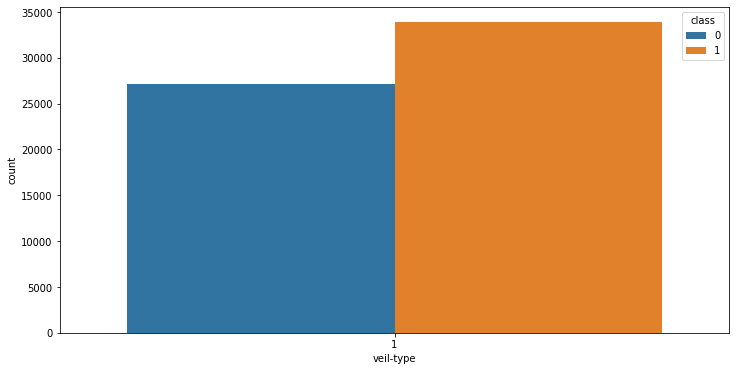

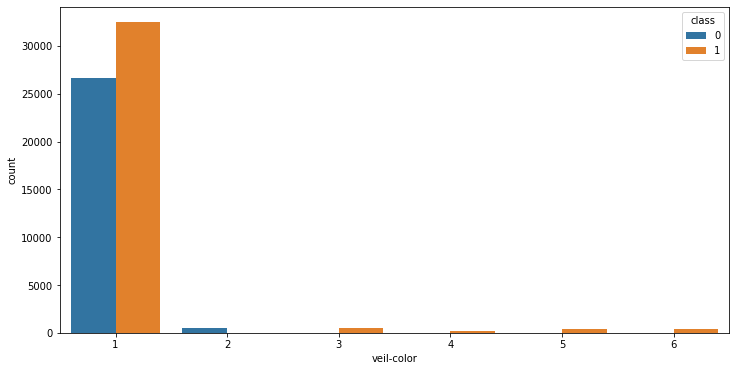

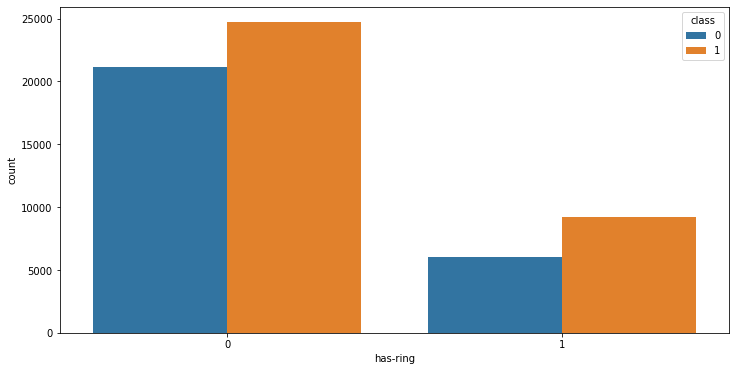

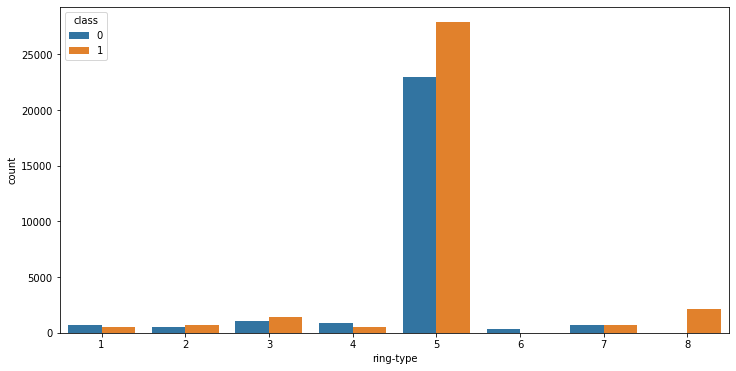

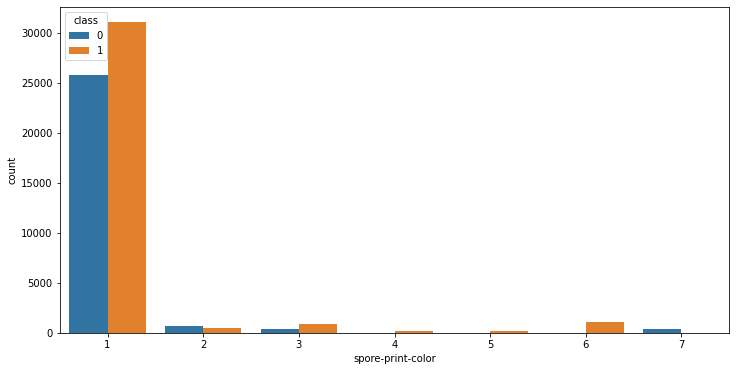

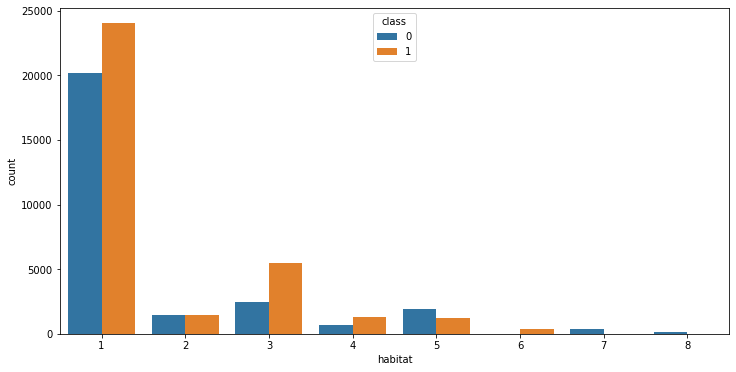

<Figure size 864x432 with 0 Axes>

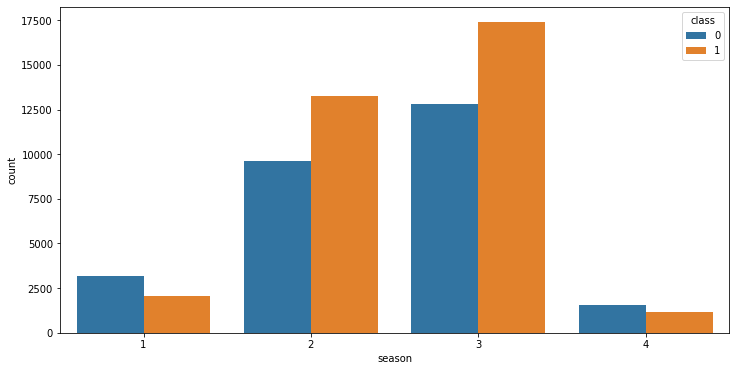

In [15]:
# Countplot of every variable with hue = class/target
for i, col in enumerate(shroom_copy.columns):
    plt.figure(figsize=(12,6))
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=shroom_copy)
    

<AxesSubplot:>

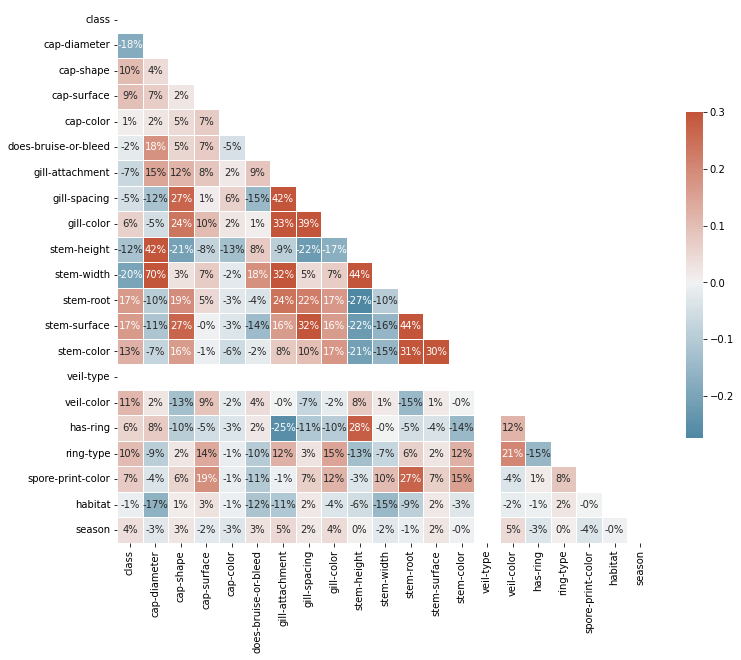

In [16]:
# Adjust the plot size
plt.subplots(figsize=(12,12))   

# Draw the heatmap with the mask and correct aspect ratio
corr = shroom_copy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.0%',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- As seen above the veil-type column has a NaN value when used with the corr() function.
- We should drop that column in that case.

In [17]:
# Drop specific date attribute to use with visualization
shroom_copy.drop('veil-type', axis=1, inplace=True)

In [18]:
#  returns the correlation matrix of the dataframe
corr_matrix = shroom_copy.corr()
corr_matrix = corr_matrix['class'].sort_values(ascending=False)
corr_matrix.head()

class           1.000000
stem-root       0.167596
stem-surface    0.166577
stem-color      0.125247
veil-color      0.110278
Name: class, dtype: float64

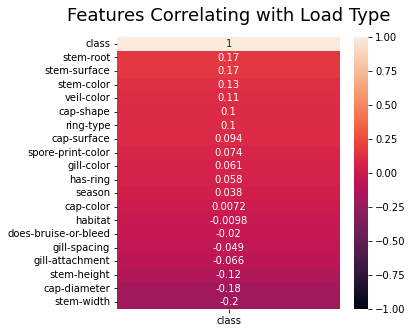

In [19]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(shroom_copy.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Load Type', fontdict={'fontsize':18}, pad=16);

In [20]:
# show the tota number of load types in this set
shroom_copy.groupby('class').size()

class
0    27181
1    33888
dtype: int64

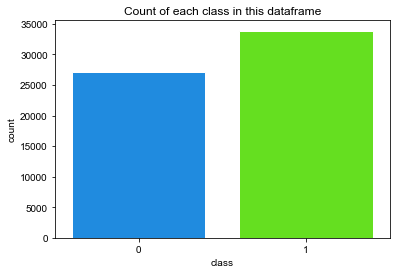

In [21]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each class in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=shroom_copy['class'], palette = 'gist_rainbow_r')

plt.show()

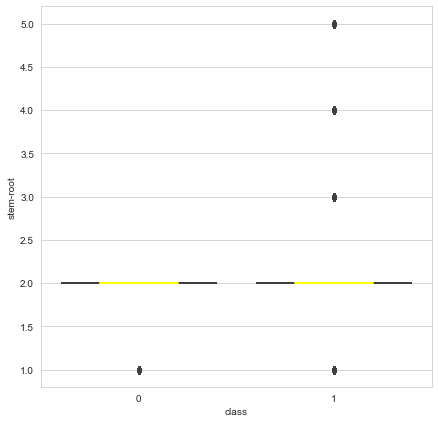

In [22]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'stem-root', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

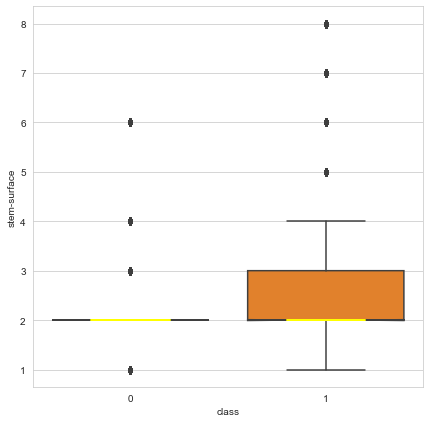

In [23]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'stem-surface', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

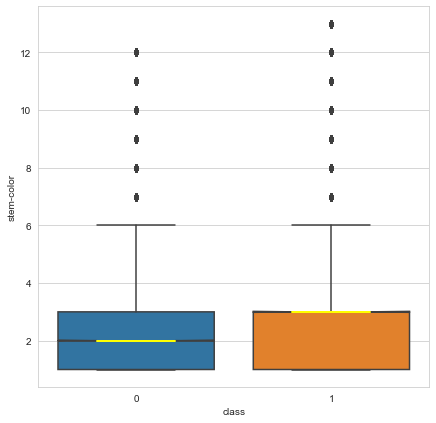

In [24]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'stem-color', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

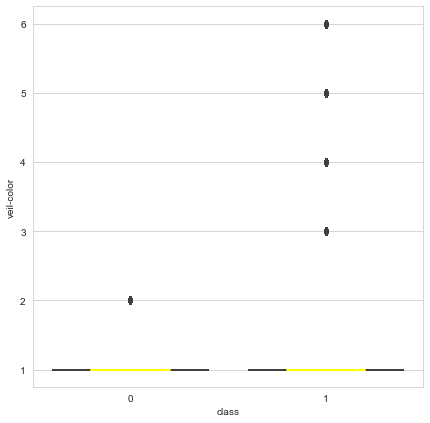

In [25]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'veil-color', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

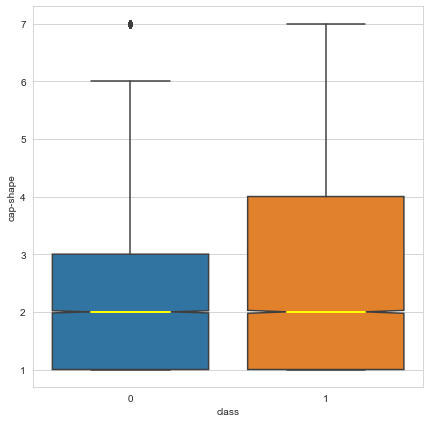

In [26]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'cap-shape', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

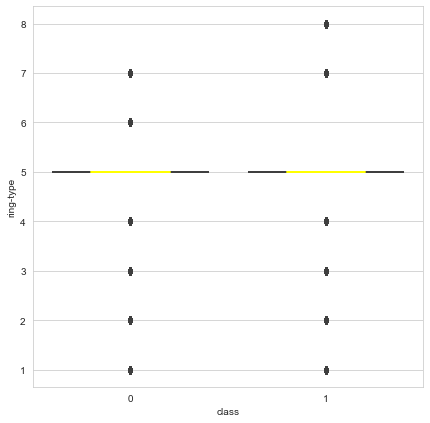

In [27]:
#Visualisation of usage_kWh with Load_type
plt.figure(figsize=(7,7))
usage_boxplot = sns.boxplot(data = shroom_copy, x = 'class', 
                            y= 'ring-type', notch = True, 
                            medianprops = dict(linestyle='-', 
                            linewidth=2, color='Yellow'))

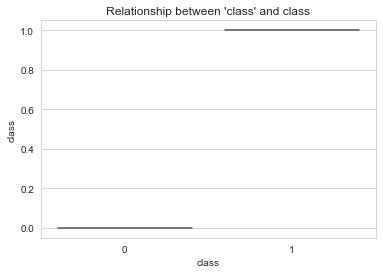

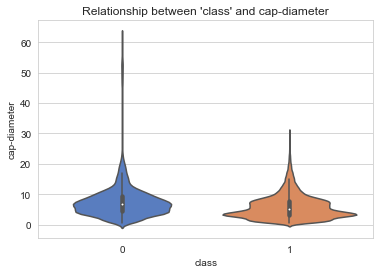

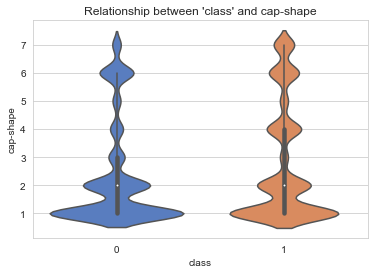

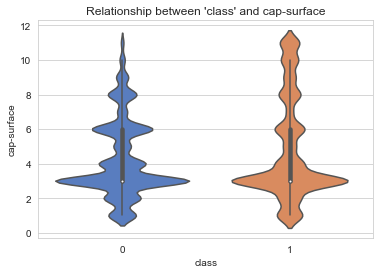

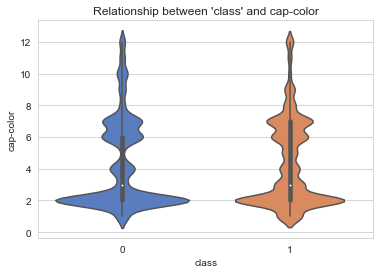

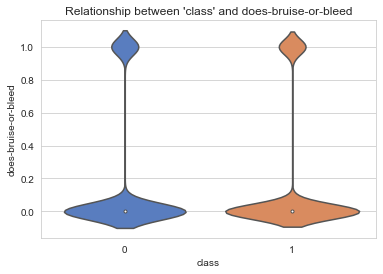

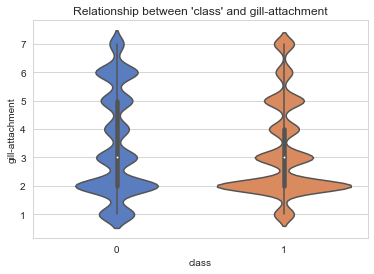

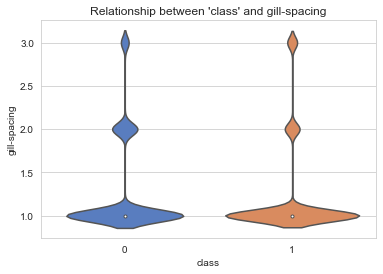

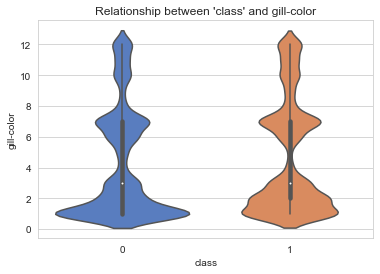

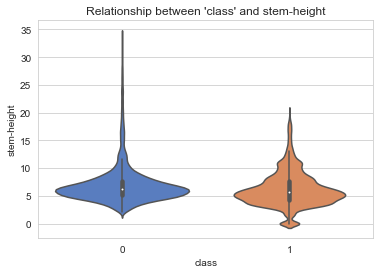

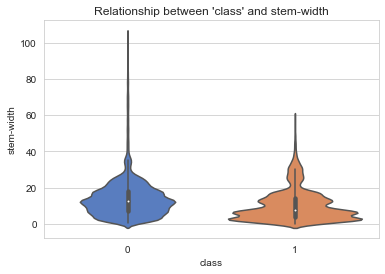

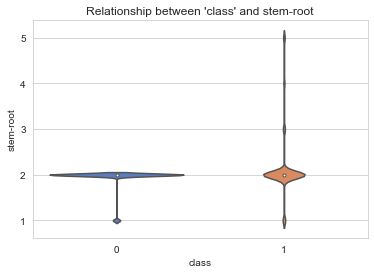

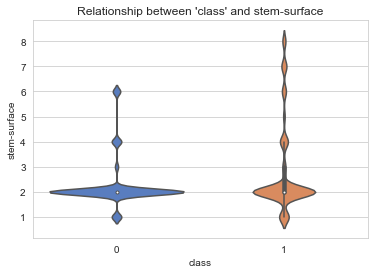

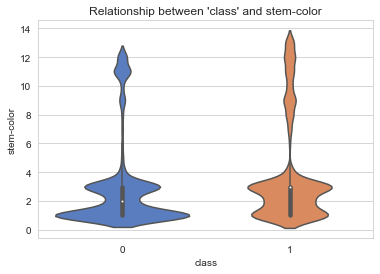

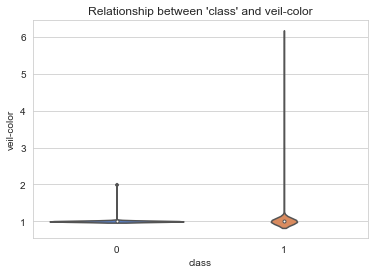

In [28]:
# get all the columns name
all_columns = shroom_copy.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[0:eliminate_target]

# plot out the graph
for a in range(0, 15):
    sns.violinplot(data=shroom_copy, x=shroom_copy['class'], y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title("Relationship between 'class' and " + all_columns[a])
    plt.show()

### Check for NULL values left in dataset

In [29]:
# Check any missing data for each columns
print(shroom_copy.isnull().values.any())

False


### Splitting of Data

In [ ]:
# Data splitting
# X,y split
x = shroom_copy.iloc[:, 1:].values
y = shroom_copy.iloc[:, 0].values

# Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", _train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

### Modeling without Post-Pruning

In [1]:
# Data splitting
# X,y split
X = shroom_copy.iloc[:, 1:].values
y = shroom_copy.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=61069)

clf = DecisionTreeClassifier(random_state=61069)
clf.fit(X_train,y_train)

y_train_predicted = clf.predict(X_train)
y_test_predicted = clf.predict(X_test)

print("Accuracy of training dataset: ",accuracy_score (y_train, y_train_predicted))
print("Accuracy of test dataset: ",accuracy_score (y_test, y_test_predicted))

NameError: name 'edata' is not defined

#### Visualizing Decision Tree Without Post Pruning

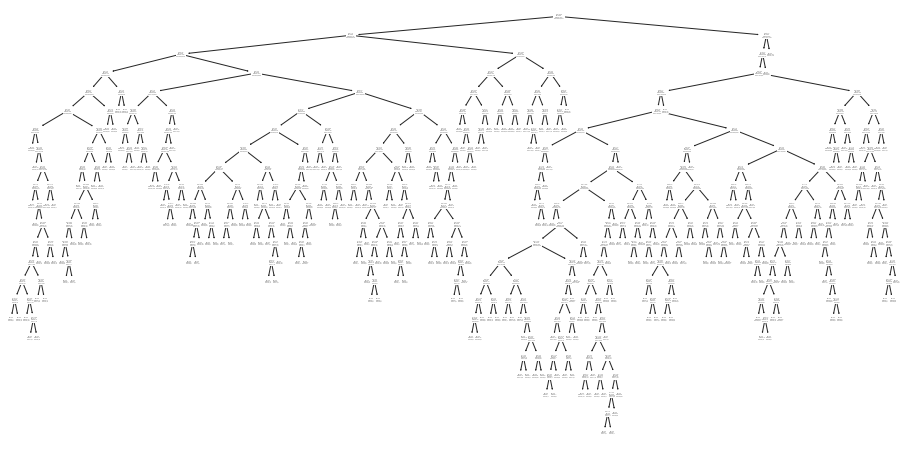

In [31]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

___

### Modeling With Post-Pruning
- ccp_alphas gives minimum leaf value of decision tree 
- ccp_aphas will create different - different classifier
- cost_complexity_pruning (ccp) technique to prune the branches of decision tree.

In [32]:
path = clf.cost_complexity_pruning_path (X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp alpha wil give list of values :\n",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :\n",impurities)

ccp alpha wil give list of values :
 [0.00000000e+00 1.36061546e-05 1.36264669e-05 1.36424052e-05
 1.99694966e-05 2.03504176e-05 2.03568830e-05 2.04308289e-05
 2.04473232e-05 2.45624808e-05 2.71545014e-05 2.72916453e-05
 2.72916453e-05 2.86562276e-05 3.07031010e-05 3.09027960e-05
 3.11904518e-05 3.20349095e-05 3.25455248e-05 3.41145567e-05
 3.43744771e-05 3.50892583e-05 3.77884320e-05 3.96969387e-05
 3.97678261e-05 4.01793668e-05 4.02712251e-05 4.06531800e-05
 4.06937926e-05 4.07727297e-05 4.07815158e-05 4.07852841e-05
 4.07852841e-05 4.08068165e-05 4.09022681e-05 4.09108939e-05
 4.48392306e-05 4.67328266e-05 4.91249616e-05 5.30935376e-05
 5.80808203e-05 5.97637671e-05 6.10148252e-05 6.12848459e-05
 6.13420814e-05 6.69885840e-05 6.78596515e-05 6.81158721e-05
 6.82291134e-05 7.40773231e-05 7.60267263e-05 8.05753339e-05
 8.09702406e-05 8.11804397e-05 8.11869114e-05 8.13861304e-05
 8.15568393e-05 8.15618388e-05 8.16503134e-05 9.09721512e-05
 9.44710800e-05 1.02135823e-04 1.13715189e-04 1.

In [33]:
shroom_copy.shape

(61069, 20)

In [34]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state = 61069, ccp_alpha = ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

print("Last node in Decision tree is {}.\nccp_alpha for last node is {}.".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Last node in Decision tree is 1.
ccp_alpha for last node is 0.02834616162602782.


<Figure size 2250x1500 with 0 Axes>

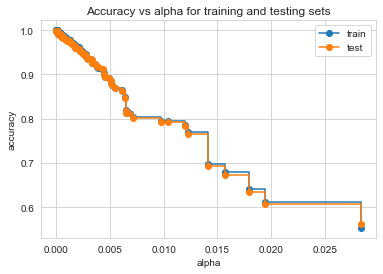

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=150)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()

plt.show()

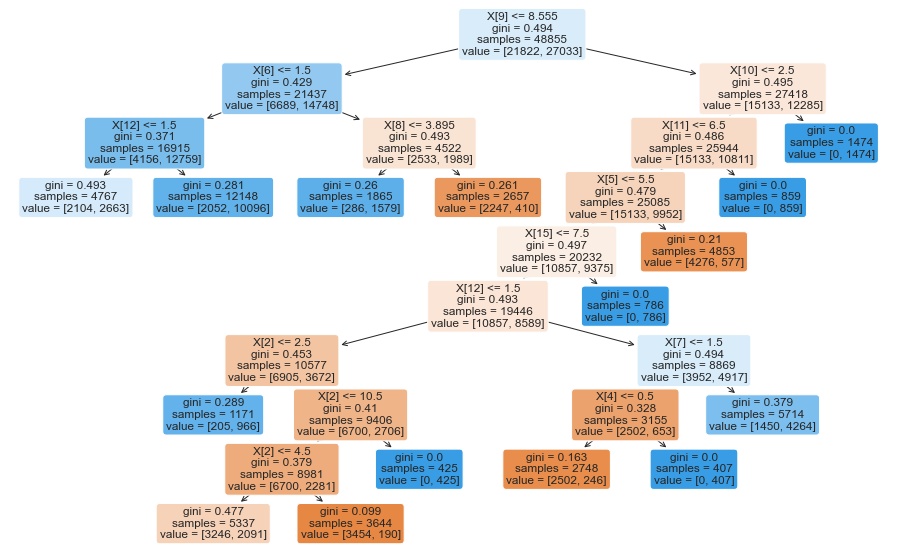

In [36]:
# Set ccp_alpha based from graph above before it starts 
# dipping significantly
clf = DecisionTreeClassifier(random_state=61069, ccp_alpha=0.0075)
clf.fit(X_train,y_train)

plt.figure(figsize=(16,10))
tree.plot_tree(clf,rounded=True,filled=True)


plt.show()

In [37]:
print("Accuracy score of test dataset after pruning:")
accuracy_score(y_test,clf.predict(X_test))

Accuracy score of test dataset after pruning:


0.8012117242508596

- As seen from above, the accuracy score increased from (before pruning)  2.8% to 80%. 
- Afer post-pruning the desicision tree has been reduced by a lot.

___

### Calculate Entropy

In [38]:
# Calculate Entropy of dataset

print('Calculating entropy...')
def findEntropy(shrooms_copy):
    #print(f'shrooms (findEntropy): \n{shroom_copy}')
    Class = shrooms_copy.keys()[-1]   # To make the code generic, changing target variable class name
    entropy = 0
    values = shrooms_copy[Class].unique()

    for value in values:
        fraction = shrooms_copy[Class].value_counts()[value] / len(shroom_copy[Class])
        entropy += -fraction * np.log2(fraction)
    return entropy

print(findEntropy(shroom_copy))

Calculating entropy...
1.5383751536631913


In [39]:
# Calculate Entropy by attribute
print("Calculating entropy by 'class' attribute...\n") 

def findEntropyAttribute(shroom_copy,attribute):
    #print(f'df (findEntropy): \n{shroom_copy}')
    print('Attribute (findEntropyAttribute): ', attribute) 
    Class = shroom_copy.keys()[-1]   #To make the code generic, changing target variable class name

    target_variables = shroom_copy[Class].unique() #This gives all 'Yes' and 'No'
    variables = shroom_copy[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)

    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(shroom_copy[attribute][shroom_copy[attribute] == variable][shroom_copy[Class] == target_variable])
            den = len(shroom_copy[attribute][shroom_copy[attribute] == variable])
            eps = np.finfo(float).eps
            fraction = num / (den+eps)
            entropy += -fraction * log(fraction+eps)
        fraction2 = den / len(shroom_copy)
        entropy2 += -fraction2 * entropy

    return abs(entropy2)

print(findEntropyAttribute(shroom_copy,'class'))

Calculating entropy by 'class' attribute...

Attribute (findEntropyAttribute):  class
1.528540400207786


### Node Class

In [40]:

class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

### Tree Class

In [41]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Train-Test Split

In [42]:
#X = shroom_copy.iloc[:, :-1].values
#Y = shroom_copy.iloc[:, -1].values.reshape(-1,1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [43]:
# Data splitting
# X,y split
x = shroom_copy.iloc[:, 1:-1].values
y = shroom_copy.iloc[:, 0].values.reshape(-1,1)

# Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (48855, 18)
Number transactions y_train dataset:  (48855, 1)
Number transactions x_test dataset:  (12214, 18)
Number transactions y_test dataset:  (12214, 1)


### Feature Scaling

In [44]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

### Fit The Model

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(x_train,x_train)
classifier.print_tree()

### Test The Model

In [ ]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

___

### Information Gain

In [45]:
# Calculate information gain & 
# return the best splitting node (feature)

print('Calculate information gain ...')
def infoGain(shroom_copy):
    #print(f'shrooms (findEntropy): \n{shrooms}')
    IG = []
    for key in shroom_copy.keys() [:-1]:
        IG.append(findEntropy(shroom_copy) - findEntropyAttribute(shroom_copy,key))

    return shroom_copy.keys()[:-1][np.argmax(IG)]


print("\nBest splitting node: ",infoGain(shroom_copy))

Calculate information gain ...
Attribute (findEntropyAttribute):  class
Attribute (findEntropyAttribute):  cap-diameter
Attribute (findEntropyAttribute):  cap-shape
Attribute (findEntropyAttribute):  cap-surface
Attribute (findEntropyAttribute):  cap-color
Attribute (findEntropyAttribute):  does-bruise-or-bleed
Attribute (findEntropyAttribute):  gill-attachment
Attribute (findEntropyAttribute):  gill-spacing
Attribute (findEntropyAttribute):  gill-color
Attribute (findEntropyAttribute):  stem-height
Attribute (findEntropyAttribute):  stem-width
Attribute (findEntropyAttribute):  stem-root
Attribute (findEntropyAttribute):  stem-surface
Attribute (findEntropyAttribute):  stem-color
Attribute (findEntropyAttribute):  veil-color
Attribute (findEntropyAttribute):  has-ring
Attribute (findEntropyAttribute):  ring-type
Attribute (findEntropyAttribute):  spore-print-color
Attribute (findEntropyAttribute):  habitat

Best splitting node:  stem-width


___

___

## ARCHIVE

### Decision Tree

In [ ]:
def getSubtable(shroom_copy, node, value):
  return shroom_copy[shroom_copy[node] == value].reset_index(drop=True)

In [ ]:
def buildTree(shroom_copy,model,tree=None): 
    # print('@@@@@@@@@@@@@@@@@ Building a classification tree................................')
    #print(f'DataFrame: \n{shroom_copy}')
    #print('tree (buildTree): ', tree)
    Class = shroom_copy.keys()[-1]   #To make the code generic, changing target variable class name
    #print('Class (buildTree): ', Class)
    #Here we build our decision tree

    #Get attribute with maximum information gain
    #print('model (buildTree): infoGain')

    if model == 'stem-width':
        #print('\nCalling infoGain(shroom_copy)')
        node = infoGain(shroom_copy)
    else:
        #print('Calling giniIndex2')
        node = giniIndex2(shroom_copy, attName)
       
    #print('node (buildTree): ', node)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValueBT = np.unique(shroom_copy[node])
    #print('attValue (buildTree): ', attValueBT)
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree = {}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValueBT:
        #print('value (buildTree): ', value)
        subtable = getSubtable(shroom_copy, node, value)

        clValue,counts = np.unique(subtable[className],return_counts=True)

        if len(counts) == 1: # Checking purity of subset
            # print('##########################################********** Recursive call 1 **********')
            # print('node (buildTree): ', node)
            # print('value (buildTree): ', tree)
            tree[node][value] = clValue[0]                                                    
        else:
            # print('##########################################********** Recursive call 2 **********')
            # print('node (buildTree): ', node)
            # print('value (buildTree): ', tree)
            # print(f'subtable (buildTree): \n{subtable}')
            tree[node][value] = buildTree(subtable, model) # Calling the function recursively 
    # print('############################################ tree to return (buildTree) ----->: ', tree)           
    return tree

print(buildTree(shroom_copy, "stem-width"))

In [ ]:
import pprint

className = 'stem-width'
print('Target Class: ', className)
model = 'infoGain'
t = buildTree(shroom_copy, model)

pprint.pprint(t)

In [ ]:
import pprint

className = 'stem-width'
print('Target Class: ', className)
model = 'gini'
t = buildTree(shroom_copy, model)

pprint.pprint(t)

------------------------------------------------------------------

In [ ]:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attribute is: ', selected_attribute)

https://val0.medium.com/100-accurate-mushroom-classification-in-python-eac61da3bace

### GINI

In [ ]:
print('Calculating gini impurity ...')

def giniImpurity2(valueCounts):
    
    #print(f'shrooms (findEntropy): \\n {shroom_copy}')
    #print('valueCounts.keys(): \n', valueCounts.keys())
    
    n = valueCounts.sum()
    p_sum = 0
    
    for key in valueCounts.keys():
        p_sum = p_sum + (valueCounts[key] / n ) * (valueCounts[key] / n )
        gini = 1 - p_sum

    return gini

print(giniImpurity2(shroom_copy))

In [ ]:
# Calculating  gini impurity for the attributes
print('Calculating gini impurity by attribute...')

def giniSplitAtt2(shroom_copy, attName):
    #print(f'df (giniSplitAtt2): \\n{shroom_copy}')
    #print('attName (giniSplitAtt2): ', attName)
    
    attValues = shroom_copy[attName].value_counts()
    gini_A = 0
    
    for key in attValues.keys():
        dfKey = shroom_copy[className][shroom_copy[attName] == key].value_counts()
        numOfKey = attValues[key]
        n = shroom_copy.shape[0]
        gini_A = gini_A + (( numOfKey / n) * giniImpurity2(dfKey))

    return gini_A

print('attName (giniSplitAtt2): ', "stem-width")
print("Gini Impurity: ", giniSplitAtt2(shroom_copy,"stem-width"))

In [ ]:
import sys

print('Calculate gini index2 ..........')

def giniIndex2(shroom_copy, attributeNames):
    #print(f'shroom_copy (findEntropy): \\n{shroom_copy}')
    print('attributeNames (giniIndex2): ', attributeNames)
    
    giniAttribute = {}
    minValue = sys.maxsize
    #attributeNames = shroom_copy[attributeNames].value_counts()
    
    for key in attributeNames.key():
        print('==========> key (giniIndex2): ', key)
        giniAttribute[key] = giniSplitAtt2(shroom_copy, "stem-width")

        if giniAttribute[key] < minValue:
            minValue = giniAttribute[key]
            selectedAttribute = key  
        print(f'Gini for {key} is {giniAttribute[key]:.3f}')
        
    minValue = min(giniAttribute.values())
    selectedAttribute = min(giniAttribute.keys())
    print('^^^^^^^^^^^^^^^^ minValue (giniIndex2): ', minValue)
    print('^^^^^^^^^^^^^^^^ giniIndex2 methods is returning (giniIndex2):', selectedAttribute)

    return selectedAttribute

#print(giniIndex2(shroom_copy, "stem-width"))